In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
os.chdir("drive/My Drive/Breast_cancer_dataset")

In [ ]:
!pwd

/content/drive/My Drive/Breast_cancer_dataset


In [ ]:
import pandas as pd

In [ ]:
#import dataset
data = pd.read_csv("data.csv")
data=data.drop(['Unnamed: 32'], axis = 1) 

In [ ]:
#Display first 5 rows of the dataset
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = data.iloc[:, 1:31].values
Y = data.iloc[:, 31].values

In [ ]:
#Display total number of rows and columns in the dataset
data.shape

(569, 32)

In [ ]:
#Statistical description of the data
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
#Check for null values in the dataset
data.isnull().sum()
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
#Understand the target varibale further
j = data["diagnosis"].value_counts()
print(j)
#Out of 569 patients, 357 had Benign and 212 had Malignant tumor

B    357
M    212
Name: diagnosis, dtype: int64


<BarContainer object of 2 artists>

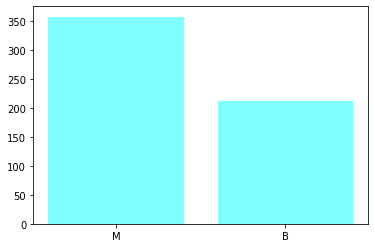

In [ ]:
import matplotlib.pyplot as plt
plt.bar(['M','B'],j,color='cyan',alpha=0.5)

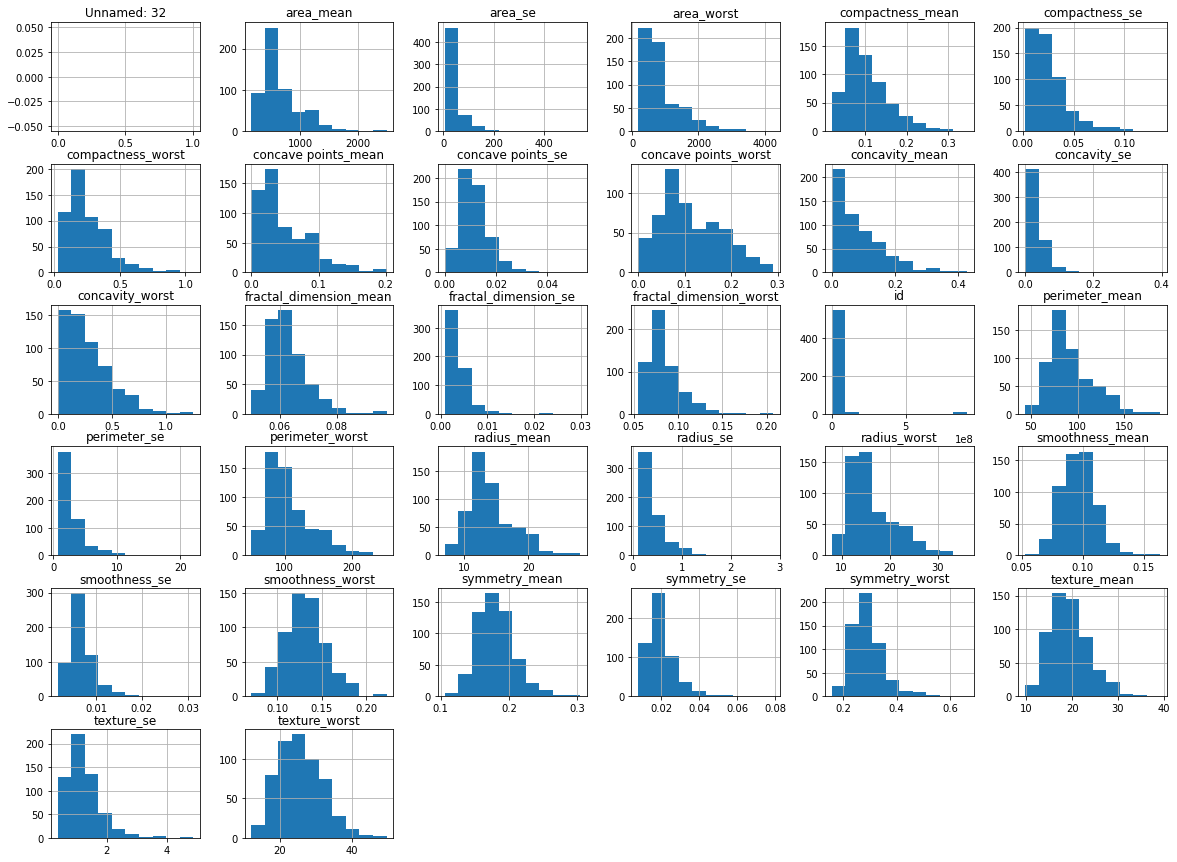

In [ ]:
#Visualize dataset using Histograms
#A histogram is a plot that lets you discover, and show, the underlying frequency distribution 

import matplotlib.pyplot as plt

num_bins = 10
data.hist(bins=num_bins, figsize=(20,15))
plt.show()

In [ ]:
# Assign independent variables (input variables) to X
X = data.iloc[:, 2:31].values


#Assign target variable to Y. Here, target variable is "diagnosis" which is in position 1
Y = data.iloc[:, 1].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [ ]:
#Split the dataset into 75% train and 25% test data

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
#As mentioned above, standardize the features using StandardScaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.linear_model import LogisticRegression

classifier_1= LogisticRegression(random_state = 0)

#Train the model
classifier_1.fit(X_train, Y_train)

#Test it using the test dataset
Y_pred1 = classifier_1.predict(X_test)

0.9440559440559441


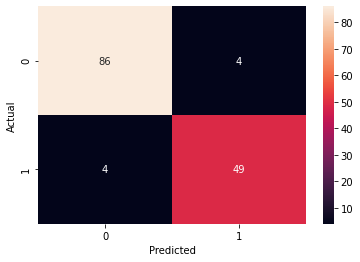

In [ ]:
#Model Evaluation

print (accuracy_score(Y_test, Y_pred1))
confusion_matrix = pd.crosstab(Y_test, Y_pred1, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier_2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_2.fit(X_train, Y_train)
Y_pred2 = classifier_2.predict(X_test)

0.958041958041958


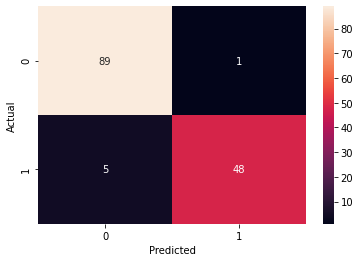

In [ ]:
print (accuracy_score(Y_test, Y_pred2))
confusion_matrix = pd.crosstab(Y_test, Y_pred2, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
from sklearn.svm import SVC
classifier_3 = SVC(kernel = 'linear', random_state = 0)
classifier_3.fit(X_train, Y_train)
Y_pred3 = classifier_3.predict(X_test)

0.965034965034965


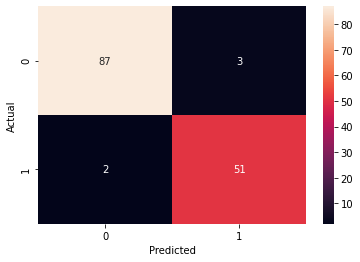

In [ ]:
print (accuracy_score(Y_test, Y_pred3))
confusion_matrix = pd.crosstab(Y_test, Y_pred3, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
from sklearn.svm import SVC
classifier_4 = SVC(kernel = 'rbf', random_state = 0)
classifier_4.fit(X_train, Y_train)
Y_pred4 = classifier_4.predict(X_test)

0.965034965034965


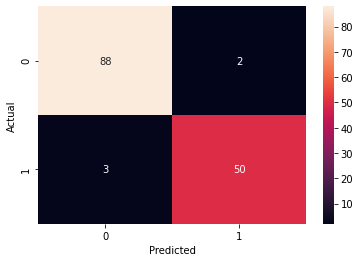

In [ ]:
print (accuracy_score(Y_test, Y_pred4))
confusion_matrix = pd.crosstab(Y_test, Y_pred4, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_5 = GaussianNB()
classifier_5.fit(X_train, Y_train)
Y_pred5 = classifier_5.predict(X_test)

0.9230769230769231


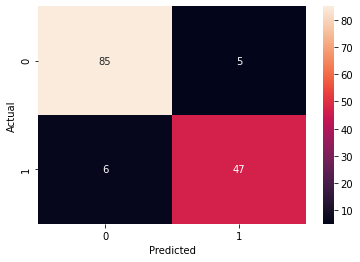

In [ ]:
print (accuracy_score(Y_test, Y_pred5))
confusion_matrix = pd.crosstab(Y_test, Y_pred5, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier_6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_6.fit(X_train, Y_train)
Y_pred6 = classifier_6.predict(X_test)

0.951048951048951


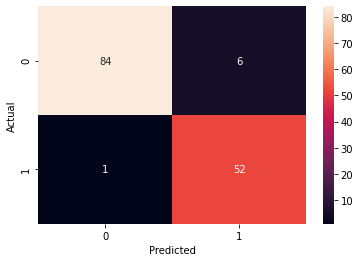

In [ ]:
print (accuracy_score(Y_test, Y_pred6))
confusion_matrix = pd.crosstab(Y_test, Y_pred6, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_7 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_7.fit(X_train, Y_train)
Y_pred7 = classifier_7.predict(X_test)

0.965034965034965


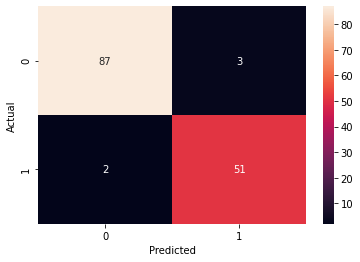

In [ ]:
print (accuracy_score(Y_test, Y_pred7))
confusion_matrix = pd.crosstab(Y_test, Y_pred7, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

[0]Logistic Regression Training Accuracy: 0.9906103286384976
[1]K Nearest Neighbor Training Accuracy: 0.9765258215962441
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9882629107981221
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9835680751173709
[4]Gaussian Naive Bayes Training Accuracy: 0.9507042253521126
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9953051643192489


<BarContainer object of 7 artists>

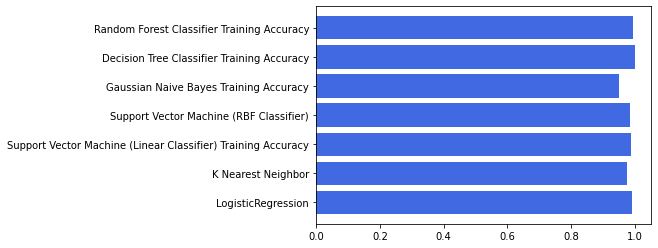

In [ ]:
print('[0]Logistic Regression Training Accuracy:', classifier_1.score(X_train, Y_train))
print('[1]K Nearest Neighbor Training Accuracy:', classifier_2.score(X_train, Y_train))
print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', classifier_3.score(X_train, Y_train))
print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', classifier_4.score(X_train, Y_train))
print('[4]Gaussian Naive Bayes Training Accuracy:', classifier_5.score(X_train, Y_train))
print('[5]Decision Tree Classifier Training Accuracy:', classifier_6.score(X_train, Y_train))
print('[6]Random Forest Classifier Training Accuracy:', classifier_7.score(X_train, Y_train))
h=[classifier_1.score(X_train, Y_train),classifier_2.score(X_train, Y_train),classifier_3.score(X_train, Y_train),classifier_4.score(X_train, Y_train),classifier_5.score(X_train, Y_train),classifier_6.score(X_train, Y_train), classifier_7.score(X_train, Y_train)]
y=['LogisticRegression','K Nearest Neighbor','Support Vector Machine (Linear Classifier) Training Accuracy','Support Vector Machine (RBF Classifier)','Gaussian Naive Bayes Training Accuracy','Decision Tree Classifier Training Accuracy','Random Forest Classifier Training Accuracy']
plt.barh(y,h,color='royalblue')
#return classifier_1, classifier_2, classifier_3, classifier_4, classifier_5, classifier_6, classifier_7

[0]Logistic Regression Testing Accuracy: 0.9440559440559441
[1]K Nearest Neighbor Testing Accuracy: 0.958041958041958
[2]Support Vector Machine (Linear Classifier) Testing Accuracy: 0.965034965034965
[3]Support Vector Machine (RBF Classifier) Testing Accuracy: 0.965034965034965
[4]Gaussian Naive Bayes Testing Accuracy: 0.9230769230769231
[5]Decision Tree Classifier Testing Accuracy: 0.951048951048951
[6]Random Forest Classifier Testing Accuracy: 0.965034965034965


<BarContainer object of 7 artists>

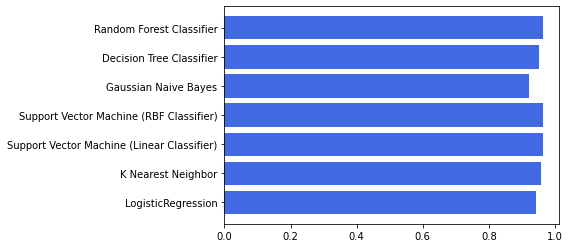

In [ ]:
print('[0]Logistic Regression Testing Accuracy:', accuracy_score(Y_test, Y_pred1))
print('[1]K Nearest Neighbor Testing Accuracy:', accuracy_score(Y_test, Y_pred2))
print('[2]Support Vector Machine (Linear Classifier) Testing Accuracy:', accuracy_score(Y_test, Y_pred3))
print('[3]Support Vector Machine (RBF Classifier) Testing Accuracy:', accuracy_score(Y_test, Y_pred4))
print('[4]Gaussian Naive Bayes Testing Accuracy:', accuracy_score(Y_test, Y_pred5))
print('[5]Decision Tree Classifier Testing Accuracy:', accuracy_score(Y_test, Y_pred6))
print('[6]Random Forest Classifier Testing Accuracy:', accuracy_score(Y_test, Y_pred7))
a=[accuracy_score(Y_test, Y_pred1),accuracy_score(Y_test, Y_pred2),accuracy_score(Y_test, Y_pred3),accuracy_score(Y_test, Y_pred4),accuracy_score(Y_test, Y_pred5),accuracy_score(Y_test, Y_pred6),accuracy_score(Y_test, Y_pred7)]
b=['LogisticRegression','K Nearest Neighbor','Support Vector Machine (Linear Classifier)','Support Vector Machine (RBF Classifier)','Gaussian Naive Bayes','Decision Tree Classifier','Random Forest Classifier']
plt.barh(b,a,color='royalblue',alpha=0.3)


In [ ]:
12.45,	15.7,	82.57,	477.1,	0.1278,	0.17,	0.1578,	0.08089,	0.2087,	0.07613,	0.3345,	0.8902,	2.217,	27.19,	0.00751,	0.03345,	0.03672,	0.01137,	0.02165,	0.005082,	15.47,	23.75,	103.4	,741.6,	0.1791,	0.5249,	0.5355,	0.1741,	0.3985,	0.1244

In [ ]:
x1  = sc.transform([[12.45,	15.7,	82.57,	477.1,	0.1278,	0.17,	0.1578,	0.08089,	0.2087,	0.07613,	0.3345,	0.8902,	2.217,	27.19,	0.00751,	0.03345,	0.03672,	0.01137,	0.02165,	0.005082,	15.47,	23.75,	103.4	,741.6,	0.1791,	0.5249,	0.5355,	0.1741,	0.3985]])
x2  = sc.transform([[18.63,25.11,124.8,1088,0.1064,0.1887,0.2319,	0.1244,	0.2183,	0.06197,	0.8307,	1.466,	5.574,	105,	0.006248,	0.03374,	0.05196,	0.01158,	0.02007,	0.00456,	23.15	,34.01,	160.5,	1670,	0.1491,	0.4257,	0.6133,	0.1848,	0.3444]])

In [ ]:
real_input = x1  = sc.transform([[12.45,	15.7,	82.57,	477.1,	0.1278,	0.17,	0.1578,	0.08089,	0.2087,	0.07613,	0.3345,	0.8902,	2.217,	27.19,	0.00751,	0.03345,	0.03672,	0.01137,	0.02165,	0.005082,	15.47,	23.75,	103.4	,741.6,	0.1791,	0.5249,	0.5355,	0.1741,	0.3985]])
if classifier_7.predict(real_input) == [0] :
  print('Benign')
else :
  print('Malignant')

Malignant


In [ ]:
mf=data[data['diagnosis'] == 'M']
bf=data[data['diagnosis'] == 'B']

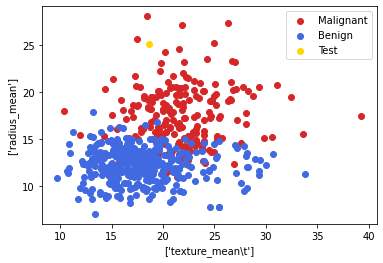

In [ ]:
Test=[18.63,25.11,124.8,1088,0.1064,0.1887,0.2319,	0.1244,	0.2183,	0.06197,	0.8307,	1.466,	5.574,	105,	0.006248,	0.03374,	0.05196,	0.01158,	0.02007,	0.00456,	23.15	,34.01,	160.5,	1670,	0.1491,	0.4257,	0.6133,	0.1848,	0.3444]


plt.scatter(mf['texture_mean'],mf['radius_mean'],label='Malignant',c='tab:red')
plt.scatter(bf['texture_mean'],bf['radius_mean'],label='Benign',c='royalblue')
plt.scatter(Test[0],Test[1],label='Test',c='gold')
plt.xlabel(['texture_mean	'])
plt.ylabel(['radius_mean'])
plt.legend()





In [ ]:
bf.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,NaN
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,NaN
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,NaN
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,NaN
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,NaN
